In [1]:
import numpy as np
import random as random

In [2]:
from copy import deepcopy

In [3]:
from matplotlib import pyplot as plt

In [4]:
from scipy import stats

In [5]:
t = 100

In [6]:
V = np.random.normal(0, 1, t)
V_ = np.random.normal(0, 1, t)


In [7]:
def markov_step(pi):#шаг цепи Маркова
    
    rand = np.random.uniform(0, 1)
    #rand = 0.85
    next_state = 0
    
    zero = 0
        
    for j in range(len(pi)):
        
        if(j == 0):
            if(rand < pi[j]):
                next_state = j
                break;
        
        if (j != 0) and (j != len(pi) - 1):
            if rand >= zero and rand < zero + pi[j]:
                next_state = j
                break;
            #else:
            #    next_state = next_state
        if (j == len(pi) - 1):
            if rand >= zero:
                next_state = j
                break;
                
        zero += pi[j]
        
    next_state_ohe = np.zeros((len(pi)))
    next_state_ohe[next_state] = 1
                
    return next_state_ohe,next_state, rand

In [8]:
def markov_chain(pi0,P,t):

    first_step = markov_step(pi0)[0]#первый шаг
    pi_next = P[np.nonzero(first_step)[0][0]]
    history = np.zeros((t,len(pi0)))
    history[0] = deepcopy(first_step)
    
    for i in range(1,t):
        step = markov_step(pi_next)[0]
        history[i] = step
        pi_next = P[np.nonzero(step)[0][0]]
    
    return history

In [9]:
P = np.zeros((4,4))

P[0][0] = 0
P[0][1] = 1
P[0][2] = 0
P[0][3] = 0
P[1][0] = np.sin(8*np.pi/5)**2
P[1][1] = 0
P[1][2] = np.cos(8*np.pi/5)**2
P[1][3] = 0
P[2][0] = 0
P[2][1] = 0
P[2][2] = 0
P[2][3] = 1
P[3][0] = np.cos(8*np.pi/10)**2
P[3][1] = 0
P[3][2] = np.sin(8*np.pi/10)**2
P[3][3] = 0

In [10]:
pi0 = np.zeros((4))

pi0[0] = 1/2*(np.sin(8*np.pi/6)**2)
pi0[1] = 1/2*(np.cos(8*np.pi/6)**2)
pi0[2] = 1/2*(np.sin(8*np.pi/12)**2)
pi0[3] = 1/2*(np.cos(8*np.pi/12)**2)

In [11]:
#markov_chain(pi0,P,t)

In [12]:
#3.1

markov_sim = markov_chain(pi0,P,t)#моделирование
markov_triv = np.zeros((t,len(pi0)))#тривиальный прогноз

for i in range(t):
    if(i == 0):
        markov_triv[i] = deepcopy(pi0)
    if(i != 0):
        markov_triv[i] = deepcopy(P.transpose().dot(markov_triv[i-1]))
        #markov_triv[i] = P[np.argmax(P[np.nonzero(markov_sim[i-1])[0][0]])]#old

#markov_sim = markov_sim.reshape(t,4)

In [13]:
delta_1 = markov_triv - markov_sim #ошибки для всех t

In [14]:
delta_1[0]#ошибка для начального состояния

array([ 0.375,  0.125, -0.625,  0.125])

In [15]:
np.cov(delta_1[0],delta_1[0])#ковариация

array([[0.1875, 0.1875],
       [0.1875, 0.1875]])

In [16]:
delta_1[0]

array([ 0.375,  0.125, -0.625,  0.125])

In [17]:
np.cov(delta_1,delta_1).shape

(200, 200)

In [18]:
P

array([[0.       , 1.       , 0.       , 0.       ],
       [0.9045085, 0.       , 0.0954915, 0.       ],
       [0.       , 0.       , 0.       , 1.       ],
       [0.6545085, 0.       , 0.3454915, 0.       ]])

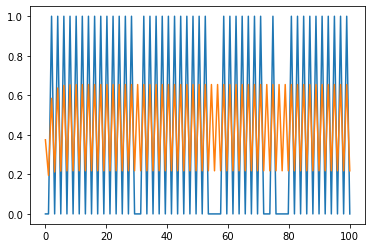

In [19]:
x = np.linspace(0,t,t)
#y = np.nonzero(markov_sim)[1]
y = markov_sim.transpose()[0]

plt.plot(x,y)

y = markov_triv.transpose()[0]
plt.plot(x,y)

# 3.3 Нелинейная оценка

In [60]:
c = np.zeros((4,1))
c[0] = 1
c[1] = 2
c[2] = 3
c[3] = 4
c = c.transpose()

sigma = np.zeros((4,1))
sigma[0] = 5
sigma[1] = 6
sigma[2] = 7
sigma[3] = 8
sigma = sigma * np.array([1, 10 ,100, 1000]).reshape(-1, 1)
sigma = sigma.transpose()

In [61]:
Y = np.zeros((t,len(pi0)))

for i in range(t):
    Y[i] = c.dot(markov_sim[i]) + sigma.dot(markov_sim[i])*V[i]

In [62]:
print(Y[0])

[455.02451128 455.02451128 455.02451128 455.02451128]


In [63]:
c_ = np.zeros((4,1))
c_[0] = 1
c_[1] = 2
c_[2] = 3
c_[3] = 4

sigma_ = np.zeros((4,1))
sigma_[0] = 5
sigma_[1] = 6
sigma_[2] = 7
sigma_[3] = 8

sigma = sigma * np.array([1, 10 ,100, 1000]).reshape(-1, 1)

In [64]:
print('C ', c_.shape)
print('Sig ', sigma_.shape)

C  (4, 1)
Sig  (4, 1)


In [65]:
# markov_lin = np.zeros((t,len(pi0)))


# for i in range(t):
#     if i == 0:
#         markov_lin[i] = deepcopy(pi0)
#         prognoz= deepcopy(pi0)
#         K_t = np.diag(pi0) - pi0 @ pi0.T; 
#     if i != 0:
        
#         prognoz = deepcopy(P.transpose().dot(markov_lin[i-1]))

#         s_s = np.zeros(4)
#         for i in range(4):
#             s_s[i] = sigma_[i]*sigma_[i] 
#         R = (s_s).dot(prognoz)
    

#         K_t = P * K_t * P.T + R;     
        
#         X_t = prognoz + np.sqrt(R) * V_[i]
#         X_t = np.array(X_t.tolist()[0])
#         pod_inv = c_.T.dot(K_t).dot(c_)
        
        
#         inv_ = np.linalg.pinv(pod_inv)[0][0]
#         K_T_C = K_t @ c_
#         C_M = c.dot(prognoz)
#         Y_ = c.dot(X_t) + sigma.dot(X_t)*V[i] - C_M
#         Y_ = np.array(Y_.tolist()[0])
#         print(Y_)
#         markov_lin[i] = prognoz + K_T_C.T.dot(inv_).dot(Y_);

#         K_t = K_t - K_T_C.T.dot(inv_).dot(K_T_C)
#         K_t = np.array(K_t.tolist()[0])
#         #markov_lin[i] = markov_lin[i] / np.sum(markov_lin[i])

# #markov_lin = np.clip(markov_lin, -1, 1)
        
markov_lin = np.zeros((t,len(pi0)))


for i in range(t):
    if i == 0:
        markov_lin[i] = deepcopy(pi0)
        prognoz= deepcopy(pi0)
        K_t = np.diag(pi0) - pi0 @ pi0.T; 
    if i != 0:
        
        prognoz = deepcopy(P.T.dot(prognoz))
        R = 0
        for i in range(4):
            R += sigma[i] * sigma[i] * prognoz[i]
        K_t = deepcopy(P.T.dot(K_t).dot(P)) + R

        X_t = prognoz + sigma_.T.dot(prognoz) * V_[i]
        Y_ = c_.T.dot(X_t) + sigma_.T.dot(X_t) * V[i]

        markov_lin[i] = prognoz - K_t.dot(c_).T.dot(np.linalg.pinv(c_.T.dot(K_t).dot(c_) + R)).dot(Y_ - c_.T.dot(prognoz)) 
        K_t =  K_t - K_t.dot(c_).T.dot(np.linalg.pinv(c_.T.dot(K_t).dot(c_) + R)).dot(c_.T).dot(K_t)
        
        #markov_lin[i] = markov_lin[i] / np.sum(markov_lin[i])

markov_lin = np.clip(markov_lin, 0, 1)
        
                

In [66]:
markov_lin[:5]

array([[0.375     , 0.125     , 0.375     , 0.125     ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.89299924, 1.        , 0.70666024, 0.77032124],
       [0.        , 0.        , 0.        , 0.        ]])

In [67]:
markov_nlin = np.zeros((t,len(pi0)))

for i in range(t):
    if i == 0:
        markov_nlin[i] = deepcopy(pi0)
            
    if i != 0:
        
        prognoz = deepcopy(P.transpose().dot(markov_nlin[i-1]))
        
        summa = 0
        for n in range(len(pi0)):
            summa += (prognoz[n]/sigma[0][n])*stats.norm.pdf((Y[i]-c[0][n])/sigma[0][n])[0]
            
        for j in range(len(pi0)):
            markov_nlin[i][j] = ((prognoz[j]/sigma[0][j])*stats.norm.pdf((Y[i]-c[0][j])/sigma[0][j])[0])/summa

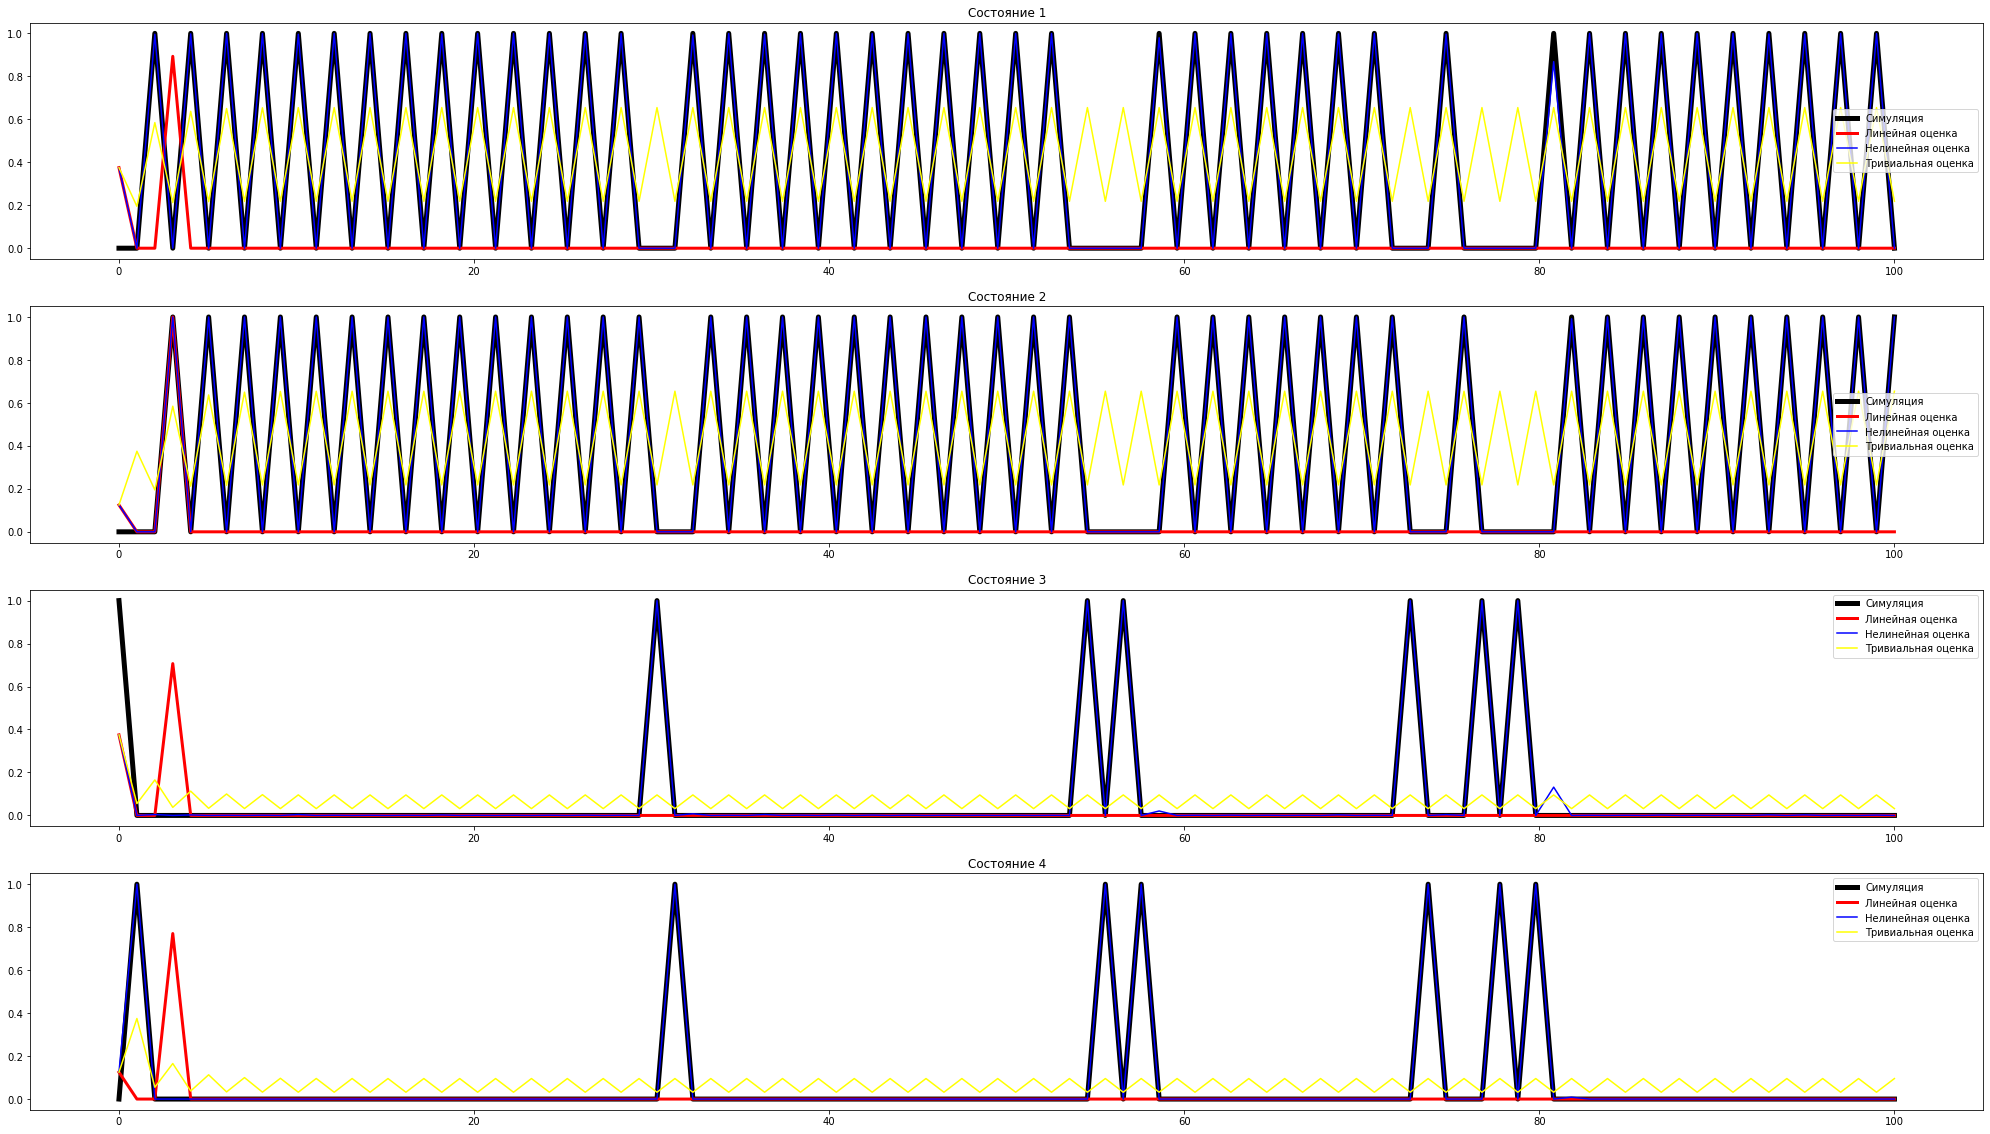

In [68]:
fig, ax = plt.subplots(4, 1, figsize = (35,20))
for i in range(len(ax)):
    x = np.linspace(0,t,100)
    y = markov_sim.transpose()[i]
    ax[i].set_title(f'Состояние {i + 1}')
    ax[i].plot(x,y, label = 'Симуляция', color = 'black', linewidth = 5)


    y = markov_lin.transpose()[i]
    ax[i].plot(x,y, label = 'Линейная оценка', color = 'red', linewidth = 3)

    y = markov_nlin.transpose()[i]
    ax[i].plot(x,y, label = 'Нелинейная оценка', color = 'blue')

    y = markov_triv.transpose()[i]
    ax[i].plot(x,y, label = 'Тривиальная оценка', color = 'yellow')
    ax[i].legend()